# 게시글 감정 분석

In [1]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import matplotlib.pyplot as plt

In [4]:
# 데이터 로드
file_path = 'everytime_crawling_all.csv'
df = pd.read_csv(file_path)

In [5]:
# XLM-RoBERTa 모델 및 토크나이저 로드
model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# 감정 분석 파이프라인 생성
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:  58%|#####8    | 650M/1.11G [00:00<?, ?B/s]

In [6]:
# 게시글에 대한 감정 분석 수행
def get_sentiment(text):
    try:
        result = sentiment_analysis(text[:512])[0]
        return result['label']
    except Exception as e:
        return str(e)

df['감정분석'] = df['내용'].apply(get_sentiment)

In [7]:
# 감정분석 결과 확인
df

,날짜,좋아요,내용,감정분석
0,36분 전,12,덕설이 ㄹㅇ 앙큼하고 사람같은 점:아까 논술고사 끝나구 학생들 나오기 시작하니까 갑...,positive
1,49분 전,0,학교 20분 거리면 닥 도서관 가서 공부?아님 안 씻고 집에서 공부?,neutral
2,2022-11-27 9:53,0,도서관 왔는데 오자마자 집 가고싶어지는거 어쩔... 왤케 힘이 없지,negative
3,2022-11-26 17:00,109,학교 왔다 현수막 봤는데 개길어ㅋㅋㅋ태어나서 본 현수막중 제일 장대한 길이를 자랑함...,positive
4,2022-11-26 15:56,5,종로캠 들어가는거 이제 도서관 모바일 학생증으로 통일하기로 했대 가 볼 사람 참고해...,negative
...,...,...,...,...
2393,2017-08-18 14:26,0,동덕다니는 애한테 학벌로 까이면 뭐라고 답해야 함?,negative
2394,2017-05-02 12:40,1,"우리 고홍즈 하자,,, 나 동덕다니냐는 소리 지겨워ㅜㅜㅜ",negative
2395,2017-03-01 1:57,0,어이가없어서 잠도안와서 글쓰는데 ㅋㅋㅋㅋ내친구 동덕다니는데 오늘 연대애들이랑 3대 ...,negative
2396,2017-01-29 19:55,2,아니 지가 15만원정도 되는 덕다운 추천해달래서누가 15만원으로 덕다운 살수 있는게...,negative


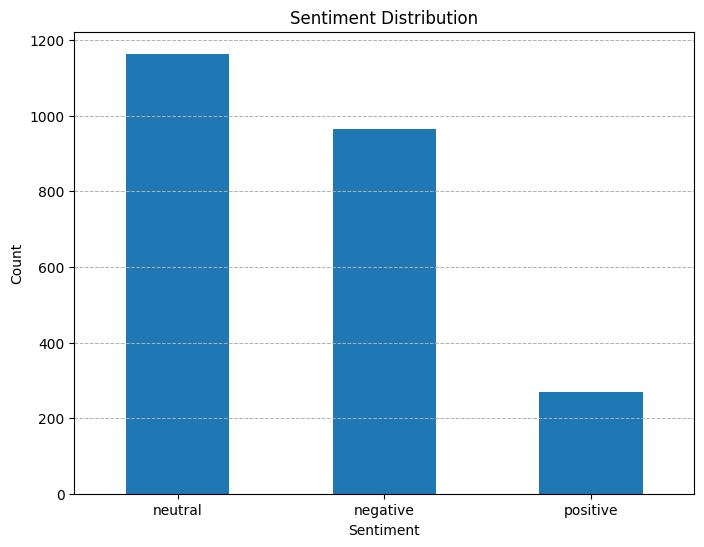

In [8]:
# 시각화
sentiment_counts = df['감정분석'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

In [9]:
# csv 파일로 저장
df.to_csv('everytime_crawling_sentiment.csv', index=False, encoding='utf-8-sig')

# 키워드가 포함된 게시글의 감정 분포를 확인해보자

In [10]:
# 워드클라우드를 통해 발견한 키워드
keywords = ['자리', '노트북', '이용', '발권', '반납']

filtered_df = df[df['내용'].apply(lambda x: any(keyword in x for keyword in keywords))]
filtered_df

,날짜,좋아요,내용,감정분석
0,36분 전,12,덕설이 ㄹㅇ 앙큼하고 사람같은 점:아까 논술고사 끝나구 학생들 나오기 시작하니까 갑...,positive
5,2022-11-26 15:23,0,덕우들 도서관에서 빌린 책 28일에 반납 예정인데 기간 연장할 수 있어?,neutral
17,2022-11-25 2:05,0,도서관에서 과제하고 싶은데 엘지그램 키스킨x면 아무래도 에바지? 노트북존에서 사용하...,neutral
18,2022-11-24 22:03,0,도서관 1층 대출 반납쪽에 있는 선생님 중 한분 나만 불친절하다고 느끼나...,negative
20,2022-11-24 13:16,0,도서관 3층 독서실?자리는 예약 어떻게 해?,neutral
...,...,...,...,...
2361,2022-10-19 10:28,4,덕다 아침에 자리 맡아놓고 수업 다 갔다가 밤에 사람 젤많은 피크일 때 돌아오는 거...,negative
2364,2022-10-18 21:49,1,진짜 너무한다 덕다 개방형 자리에 짐 두고 나간지 개오래 됐는데 한 번을 안오네 ㅋ...,negative
2368,2022-10-17 20:47,0,덕다 꼭 써야하면 미발권으로 그냥 앉아있다가 누구 오면 비켜주는게 차라리 낫다 걍....,negative
2369,2022-10-17 19:11,3,덕다 몇시간동안 비어있는거 지켜봤고 정황상 미반납이라 발권 안 되는 거 같은 자리면...,negative


In [11]:
# csv 파일로 저장
# filtered_df.to_csv('everytime_crawling_sentiment_keyword.csv', index=False, encoding='utf-8-sig')

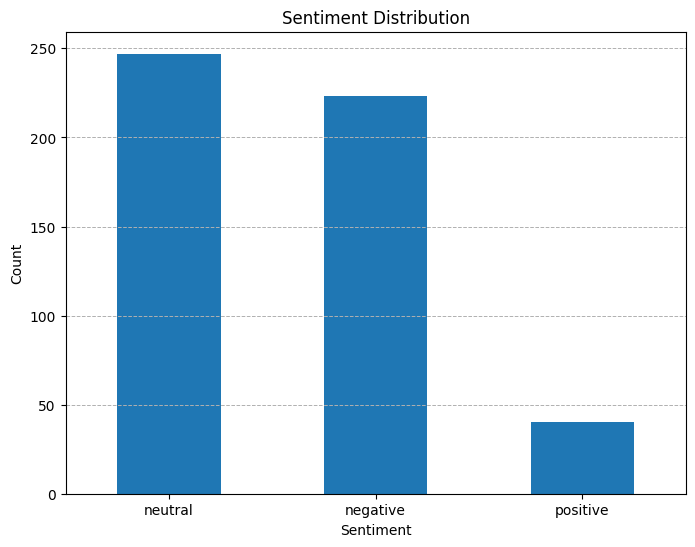

In [12]:
# 감정 분포 시각화
sentiment_counts = filtered_df['감정분석'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# 시간에 따른 감정변화 분석
## 2022-10-13 도서관 개관일 이후 감정 변화를 확인해보자.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


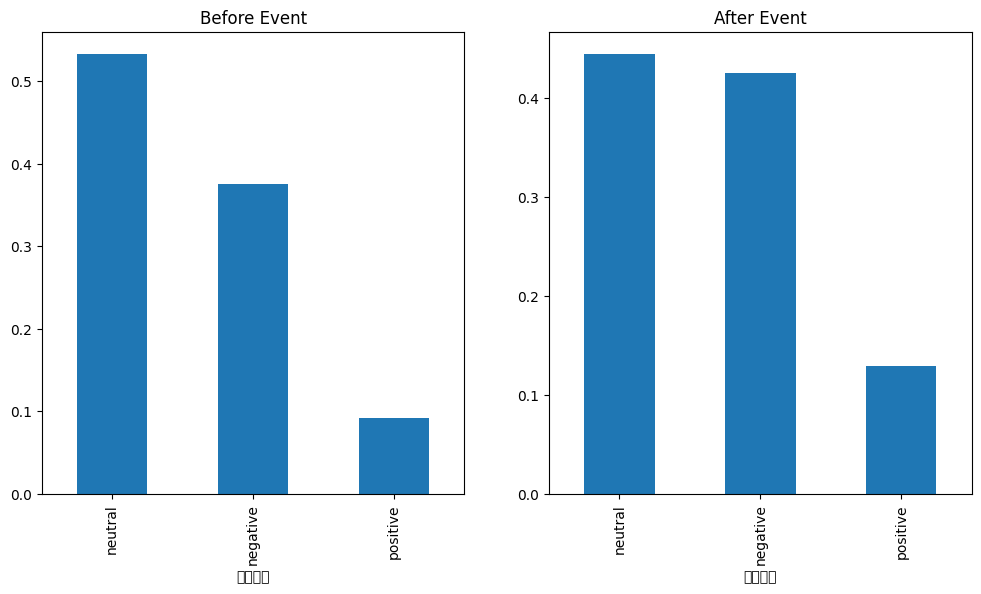

In [19]:
# 날짜를 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'], errors='coerce')

event_date = pd.to_datetime('2022-10-13')
pre_event = df[df['날짜'] < event_date]
post_event = df[df['날짜'] >= event_date]

# 감정 분포 비교
pre_event_emotions = pre_event['감정분석'].value_counts(normalize=True)
post_event_emotions = post_event['감정분석'].value_counts(normalize=True)

# 감정 분포 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
pre_event_emotions.plot(kind='bar', ax=ax[0], title='Before Event')
post_event_emotions.plot(kind='bar', ax=ax[1], title='After Event')
plt.show()


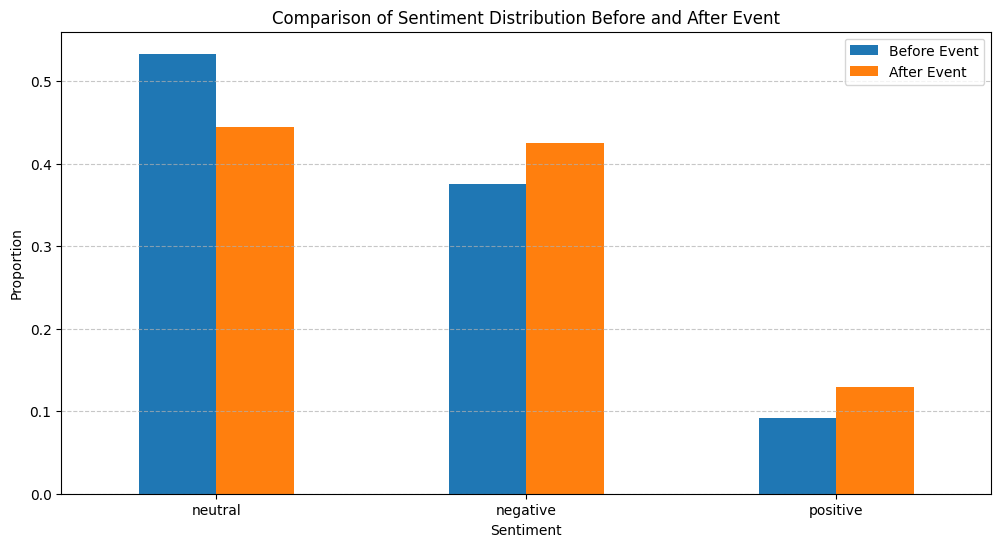

In [16]:
# 감정 분포 합치기
emotion_df = pd.DataFrame({
    'Before Event': pre_event_emotions,
    'After Event': post_event_emotions
}).fillna(0)  # NaN 값을 0으로 대체

# 감정 분포 시각화
emotion_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Sentiment Distribution Before and After Event')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

부정적, 긍정적인 게시물은 늘어났으며, 중성적인 게시물은 줄어들었다.

## 키워드가 포함된 게시글에 대한 도서관 개관 전후의 감정분석

<ipython-input-20-0998bd7c99a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_filtered_df['날짜'] = pd.to_datetime(keyword_filtered_df['날짜'], errors='coerce')


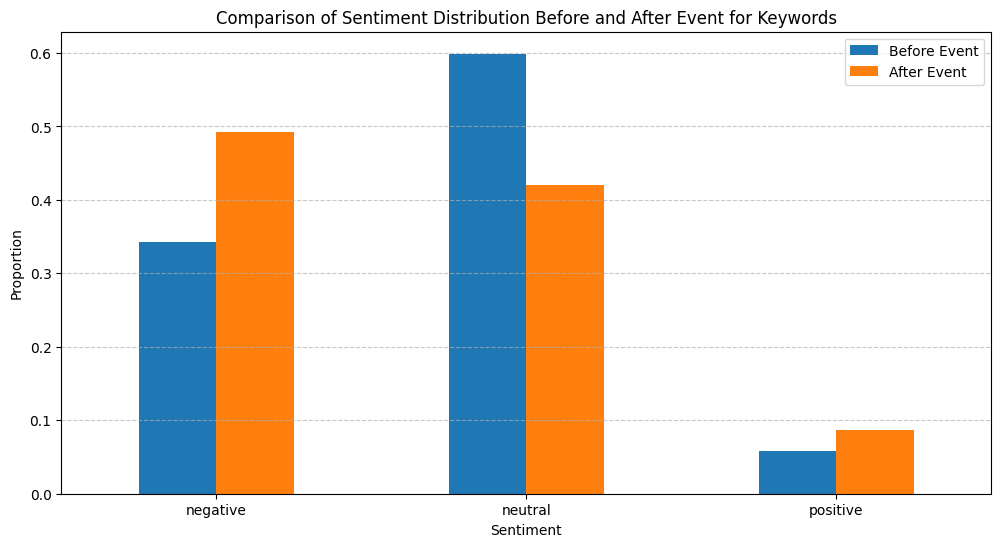

In [20]:
# Filter rows that contain any of the keywords
keywords = ['자리', '노트북', '이용', '발권', '반납']
keyword_filtered_df = df[df['내용'].apply(lambda x: any(keyword in x for keyword in keywords))]

# 날짜를 datetime 형식으로 변환
keyword_filtered_df['날짜'] = pd.to_datetime(keyword_filtered_df['날짜'], errors='coerce')

# 이벤트 발생일 설정
event_date = pd.to_datetime('2022-10-13')

# 이벤트 전후로 데이터 분할
pre_event_keyword = keyword_filtered_df[keyword_filtered_df['날짜'] < event_date]
post_event_keyword = keyword_filtered_df[keyword_filtered_df['날짜'] >= event_date]

# 감정 분포 비교
pre_event_emotions_keyword = pre_event_keyword['감정분석'].value_counts(normalize=True)
post_event_emotions_keyword = post_event_keyword['감정분석'].value_counts(normalize=True)

# 감정 분포 합치기
emotion_df_keyword = pd.DataFrame({
    'Before Event': pre_event_emotions_keyword,
    'After Event': post_event_emotions_keyword
}).fillna(0)  # NaN 값을 0으로 대체

# 감정 분포 시각화
emotion_df_keyword.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Sentiment Distribution Before and After Event for Keywords')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
